<a href="https://www.kaggle.com/code/pologonz/nftcollections?scriptVersionId=96296104" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nft-collections-dataset/nft_sales.csv
/kaggle/input/nft-collections-dataset/nft_sales_v2205.csv


## Load data and keep relevant columns

In [2]:
df = pd.read_csv('/kaggle/input/nft-collections-dataset/nft_sales.csv')
df = df.drop(columns=['Buyers','Owners'])
df

,Collections,Sales,Txns
0,Axie Infinity,"$3,328,148,500","9,755,511"
1,CryptoPunks,"$1,664,246,968","18,961"
2,Art Blocks,"$1,075,223,906","117,602"
3,Bored Ape Yacht Club,"$783,882,186","22,584"
4,NBA Top Shot,"$781,965,423","11,790,699"
...,...,...,...
245,Evolution,"$2,536,468","4,961"
246,LegionPunks,"$2,535,490","3,794"
247,BabyApes,"$2,521,714","3,405"
248,Train of the Century,"$2,504,080","39,460"


### Step 1 - Clean the data
#### Eliminate commas and currency signs, then convert to numeric

In [3]:
df = df.apply(lambda x: x.str.replace('$',''))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [4]:
df = df.apply(lambda x: x.str.replace('.',''))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [5]:
df = df.apply(lambda x: x.str.replace(',',''))

In [6]:
df['Txns'] = pd.to_numeric(df['Txns'])
df['Sales'] = pd.to_numeric(df['Sales'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Collections  250 non-null    object
 1   Sales        250 non-null    int64 
 2   Txns         250 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.0+ KB


#### Convert sales to usd million and add a usd per transaction column

In [8]:
df['Sales'] = df['Sales'] / 1e6

In [9]:
df['$/Txn'] = df['Sales'] * 1000000. // df['Txns']

In [10]:
df

,Collections,Sales,Txns,$/Txn
0,Axie Infinity,3328.148500,9755511,341.0
1,CryptoPunks,1664.246968,18961,87772.0
2,Art Blocks,1075.223906,117602,9142.0
3,Bored Ape Yacht Club,783.882186,22584,34709.0
4,NBA Top Shot,781.965423,11790699,66.0
...,...,...,...,...
245,Evolution,2.536468,4961,511.0
246,LegionPunks,2.535490,3794,668.0
247,BabyApes,2.521714,3405,740.0
248,Train of the Century,2.504080,39460,63.0


### Step 2 - Plot the data

#### Many collections with total sales under usd 10 million, and a few abvove usd 100 million

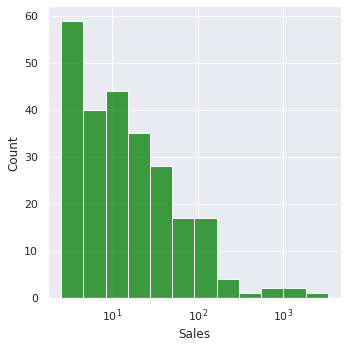

In [11]:
sns.set()
sns.displot(data=df, x="Sales", log_scale=True, color='green')

#### Sales per transaction are more evenly distributed -in the 500 - 10000 usd range

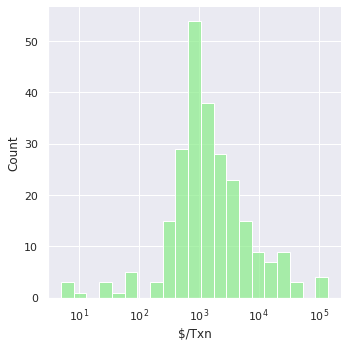

In [12]:
sns.displot(data=df, x="$/Txn", log_scale=True, color='lightgreen')

#### Some collections have sold more than usd 100 million

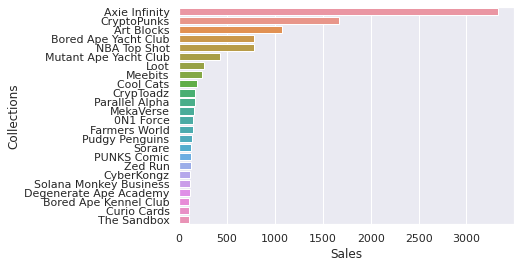

In [13]:
top_collections = df[ df['Sales'] > 100 ]
chart = sns.barplot(y="Collections", x="Sales", data=top_collections)

#### Which collections have the highest average value per transaction?

<AxesSubplot:xlabel='$/Txn', ylabel='Collections'>

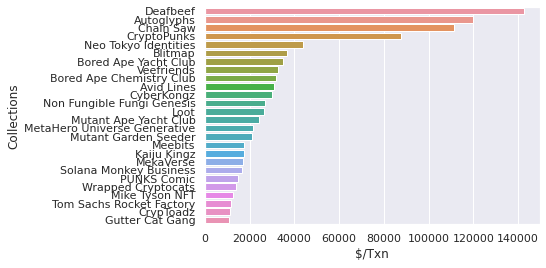

In [14]:
top_dollar = df[ df['$/Txn'] > 10000 ].sort_values(by=['$/Txn'], ascending=False)
sns.barplot(y="Collections", x="$/Txn", data=top_dollar)

#### Which are the highest volume collections?  Total sales exceeding usd 10 million and usd per transaction below usd 1000

[Text(0.5, 1.0, 'Avg $/Txn - collections total sales > 10m, ranked by total sales')]

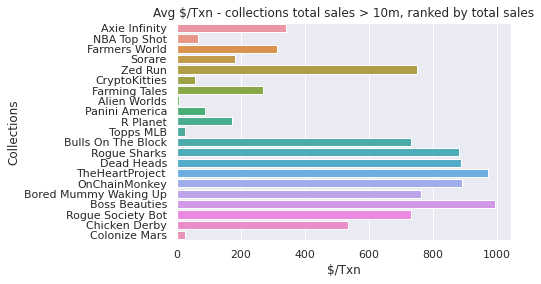

In [15]:
high_volume= df[ (df['$/Txn'] < 1000) & (df['Sales'] > 10)]
sns.barplot(y="Collections", x="$/Txn", data=high_volume).set(title='Avg $/Txn - collections total sales > 10m, ranked by total sales')

#### Which collections have the smallest total sales in this list of very successful collections?
#### What's their average sale per transaction?

<AxesSubplot:xlabel='Sales', ylabel='Collections'>

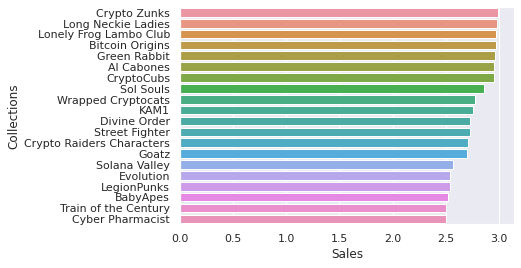

In [16]:
bottom = df[df['Sales'] < 3]
sns.barplot(y="Collections", x="Sales", data=bottom)

<AxesSubplot:xlabel='$/Txn', ylabel='Collections'>

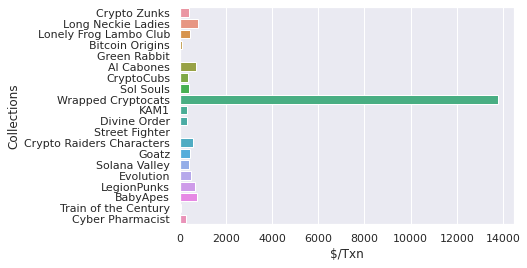

In [17]:
sns.barplot(y="Collections", x="$/Txn", data=bottom)

#### Zoom in to see the average sale per transaction for collections with less than usd 3 million in total sales

[(0.0, 1000.0)]

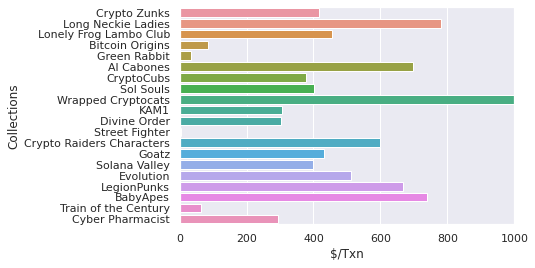

In [18]:
sns.barplot(y="Collections", x="$/Txn", data=bottom).set(xlim=(0, 1000))